# Notebook #5: Predicciones

In [2]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Para realizar la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split,GridSearchCV

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_modelos as sm

- El primer paso consiste en cargar los datos ya estandarizados.

In [19]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo5/df_estandarizado.pkl')

In [20]:
df.sample(5)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
1014,0,0.14581458145814583,0.1552734375,0.15274463007159905,0.1111111111111111,0.15235008103727715,0.1813380281690141,0.163636,0.11748251748251748,0.16666666666666666,0.17264957264957265,0.1461794019933555,0.2292358803986711,0.17086834733893558,0.15301724137931033,0.1568627450980392,0.581660,-0.261198,-0.164103,0.936084,-1.151079,-0.140269,-1.176396,-0.688417,-1.157505
2074,1,0.14581458145814583,0.14736842105263157,0.15274463007159905,0.15568862275449102,0.15235008103727715,0.1813380281690141,0.12963,0.11748251748251748,0.16666666666666666,0.1727447216890595,0.13390928725701945,0.2292358803986711,0.3253012048192771,0.15736040609137056,0.1568627450980392,0.064696,0.110104,-0.598680,0.936084,-1.151079,-0.406703,-0.308333,-0.688417,-0.008346
2522,1,0.14581458145814583,0.1552734375,0.1540983606557377,0.1646090534979424,0.16473072861668428,0.14776632302405499,0.167147,0.10451977401129943,0.16666666666666666,0.1727447216890595,0.2483221476510067,0.16630669546436286,0.139186295503212,0.15301724137931033,0.1568627450980392,0.755097,-0.989809,0.176138,-0.675468,-0.876091,-0.673137,-1.002783,-0.688417,-1.157505
121,0,0.14581458145814583,0.1552734375,0.1540983606557377,0.16486902927580893,0.15235008103727715,0.16,0.149533,0.10451977401129943,0.16666666666666666,0.1297709923664122,0.13390928725701945,0.16630669546436286,0.1794871794871795,0.15301724137931033,0.1568627450980392,-1.412663,-1.003804,-0.765193,-0.675468,0.773836,-0.806353,-0.308333,-0.688417,-0.295636
333,1,0.14581458145814583,0.1552734375,0.15274463007159905,0.1646090534979424,0.15235008103727715,0.1813380281690141,0.167147,0.2606060606060606,0.14913657770800628,0.1297709923664122,0.13778705636743216,0.16630669546436286,0.17086834733893558,0.15736040609137056,0.1568627450980392,-0.969481,1.224013,-0.699685,1.338971,0.223860,-0.806353,-0.829171,-0.034210,-0.870216


In [44]:
df.shape

(2604, 25)

- Como primer paso, para reducir las discrepancias en el orden las columnas que puedan producirse luego, vamos a reorganizarlas y renombrarlas según su orden original.

In [36]:
lista_columnas = df.columns
lista_columnas = lista_columnas.str.replace("_standard","")
df.columns = lista_columnas

In [24]:
columnas_originales = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

In [39]:
df = df[columnas_originales]

In [42]:
df.head(2)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1.578821,0,0.14581458145814583,0.14736842105263157,-0.384966,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.144828,0.11748251748251748,1.415329,-0.675468,-1.151079,0.16666666666666666,-1.339221,0.057971014492753624,-1.002783,-0.688417,-1.157505,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392
1,-0.637093,1,0.2576271186440678,0.1552734375,0.110104,0.14917127071823205,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.175325,0.2606060606060606,-0.489507,-1.078356,2.148775,0.14913657770800628,-0.673137,0.1727447216890595,-0.308333,-0.361313,-0.008346,0.13778705636743216,0.16326530612244897,0.1794871794871795,0.15736040609137056,0.17647058823529413


In [43]:
df.shape

(2604, 25)

- Nos aseguramos de que todo el conjunto sea de formato numérico.

In [45]:
df = df.astype(float)

- Definimos un diccionario de hiperparámetros:

In [15]:
parametros_default = {
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [2, 6, 8, 20, 12, 16],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [4, 6, 8]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.05, 0.1, 0.15],
                'max_depth': [5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

- Instanciamos la clase "AnalisisModelosClasificacion".

In [46]:
analisis_mod_clas = sm.AnalisisModelosClasificacion(df, "Attrition")

- Y aplicamos los modelos: regresión logística, Decision Tree, Random Forest, Gradient Boost y XGBoost.

In [ ]:
analisis_mod_clas.ajustar_modelo("logistic_regression")
df_lg = analisis_mod_clas.calcular_metricas("logistic_regression")
df_lg["modelo"] = "logistic_regression"
df_lg

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.755161,0.756531,0.755161,0.754991,0.510666,0.839334,0.001424,NaN,NaN,NaN,logistic_regression
test,0.754319,0.754271,0.754319,0.753893,0.506132,0.833550,NaN,NaN,0.001424,NaN,logistic_regression


In [ ]:
analisis_mod_clas.ajustar_modelo("tree")
df_tree = analisis_mod_clas.calcular_metricas("tree")
df_tree["modelo"] = "tree"
df_tree

Fitting 5 folds for each of 36 candidates, totalling 180 fits
El mejor modelo es DecisionTreeClassifier(max_depth=10, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.962554,0.962811,0.962554,0.962555,0.925118,0.990001,0.001229,8.0,NaN,NaN,tree
test,0.785029,0.786142,0.785029,0.784167,0.567000,0.765219,NaN,NaN,0.001229,8.0,tree


In [ ]:
analisis_mod_clas.ajustar_modelo("random_forest")
df_rf = analisis_mod_clas.calcular_metricas("random_forest")
df_rf["modelo"] = "random_forest"
df_rf

Fitting 5 folds for each of 162 candidates, totalling 810 fits
El mejor modelo es RandomForestClassifier(max_depth=16, n_estimators=200, n_jobs=-1,
                       random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.053844,-1.0,NaN,NaN,random_forest
test,0.884837,0.886655,0.884837,0.884912,0.769788,0.956736,NaN,NaN,0.053844,-1.0,random_forest


In [ ]:
analisis_mod_clas.ajustar_modelo("gradient_boosting")
df_gb = analisis_mod_clas.calcular_metricas("gradient_boosting")
df_gb["modelo"] = "gradient_boost"
df_gb

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=4, min_samples_split=5,
                           n_estimators=200, random_state=42, subsample=0.8)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.008343,8.0,NaN,NaN,gradient_boost
test,0.886756,0.888787,0.886756,0.886827,0.77367,0.952008,NaN,NaN,0.008343,8.0,gradient_boost


In [ ]:
analisis_mod_clas.ajustar_modelo("xgboost", param_grid=parametros_default["xgboost"])
df_xgb = analisis_mod_clas.calcular_metricas("xgboost")
df_xgb["modelo"] = "x_gradient_boost"
df_xgb

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.998560,0.998560,0.998560,0.998560,0.997119,0.999977,0.005275,NaN,NaN,NaN,x_gradient_boost
test,0.902111,0.903366,0.902111,0.902177,0.804203,0.958037,NaN,NaN,0.005275,NaN,x_gradient_boost


## Análisis de Métricas de los Modelos

- Nos interesa priorizar el recall, que es lo mismo que decir que, daremos prioridad a los Verdaderos Positivos.

- Consecuentemente, minimizaremos los Falsos Negativos, es decir, preferimos que el modelo nos diga que un empleado se marchará de la empresa aunque finalmente no sea así, pero queremos evitar el error (Falso Negativo) de decir que se queda cuando finalmente se acabará yendo.

In [63]:
df_completo = pd.concat([df_lg, df_tree, df_rf, df_gb, df_xgb])
df_completo.reset_index(drop=True, inplace=True)
df_completo.style.apply(sm.color_filas_por_modelo, axis = 1)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.755161,0.756531,0.755161,0.754991,0.510666,0.839334,0.001424,nan,nan,nan,logistic_regression
1,0.754319,0.754271,0.754319,0.753893,0.506132,0.833550,nan,nan,0.001424,nan,logistic_regression
2,0.962554,0.962811,0.962554,0.962555,0.925118,0.990001,0.001229,8.000000,nan,nan,tree
3,0.785029,0.786142,0.785029,0.784167,0.567000,0.765219,nan,nan,0.001229,8.000000,tree
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.053844,-1.000000,nan,nan,random_forest
5,0.884837,0.886655,0.884837,0.884912,0.769788,0.956736,nan,nan,0.053844,-1.000000,random_forest
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.008343,8.000000,nan,nan,gradient_boost
7,0.886756,0.888787,0.886756,0.886827,0.773670,0.952008,nan,nan,0.008343,8.000000,gradient_boost
8,0.998560,0.998560,0.998560,0.998560,0.997119,0.999977,0.005338,nan,nan,nan,x_gradient_boost
9,0.902111,0.903366,0.902111,0.902177,0.804203,0.958037,nan,nan,0.005338,nan,x_gradient_boost


- Por tiempo de ejecución y métricas, el XGBoost es nuestro modelo con mejores resultados, sin embargo, con valores en el train tan cercanos a 1, entendemos que muchos modelos están memorizando los datos, y eso no nos interesa. Por ese motivo, nos quedaremos con el Decision Tree.

- El siguiente paso será entrenar a nuestro modelo con todos los datos, y guardar el objeto.

In [47]:
model = analisis_mod_clas.ajustar_modelo("tree", param_grid=parametros_default["tree"], devolver_objeto=True, entrenamiento_final=True)
metricas_completo = analisis_mod_clas.calcular_metricas("tree", entrenamiento_final= True)
metricas_completo["modelo"] = "tree"
metricas_completo


 **** Se está entrenando al modelo con TODO el conjunto de datos **** 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
El mejor modelo es DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=15,
                       random_state=42)

 **** Se están mostrando las métricas para el entrenamiento del modelo con TODO el conjunto de datos **** 



,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,modelo
Conjunto completo,0.904378,0.904579,0.904378,0.904366,0.808756,0.969,0.000675,8.0,tree


In [48]:
with open('../../transformers/model.pkl', 'wb') as f:
    pickle.dump(model, f)


- En nuestro caso, recordemos que nos interesa priorizar el recall, es decir, minimizar los Falsos Negativos, que son aquellos casos que el modelo predice como negativos -el trabajador no se va-, cuando finalmente sí lo hace.

- La métrica de recall (también conocida como sensibilidad o tasa de verdaderos positivos) se usa en problemas de clasificación, especialmente cuando es importante identificar correctamente los positivos en un conjunto de datos.

- Mide entre 0 y 1 la proporción de casos positivos correctamente identificados por el modelo, en comparación con el total de casos positivos reales en el conjunto de datos. Se calcula así:

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- Donde TP (True Positives) son los Verdaderos Positivos y FN (False Negatives) los Falsos Negativos.

- Siendo que responde a la pregunta de: ¿Qué porcentaje de los casos positivos reales fue identificado correctamente por el modelo?, en este caso diríamos que, para nuestro modelo, fue capaz de detectar el 90% de los verdaderos positivos.

- También no interesa la kappa, donde tenemos una métrica similar. Esta mide el grado de concordancia entre las predicciones de un modelo y los valores reales. En otras palabras, nos indica qué porcentaje de las predicciones son reales y cuáles producto del azar. Oscila entre -1 y 1. Se interpreta así:

### Interpretación de los Tramos de Kappa

| Valor de Kappa (\(\kappa\)) | Nivel de Concordancia          | Interpretación                                     |
|-----------------------------|--------------------------------|---------------------------------------------------|
| \( \kappa < 0 \)            | Concordancia Negativa      | Peor que la concordancia esperada por azar.      |
| \( 0 \leq \kappa \leq 0.20 \) | Concordancia Pobre        | Concordancia mínima, cercana al azar.            |
| \( 0.21 \leq \kappa \leq 0.40 \) | Concordancia Baja         | Concordancia ligera.                             |
| \( 0.41 \leq \kappa \leq 0.60 \) | Concordancia Moderada     | Concordancia razonable, pero no excelente.       |
| \( 0.61 \leq \kappa \leq 0.80 \) | Concordancia Alta         | Buena concordancia, aceptable para la mayoría.   |
| \( 0.81 \leq \kappa \leq 1.0 \)  | Concordancia Perfecta     | Concordancia casi perfecta o perfecta.           |

- En nuestro caso, una kappa de 0.81 nos indica de que el modelo tiene concordancias casi perfectas.

## Análisis gráfico del modelo elegido

- Como complemento a las métricas anteriores, podemos analizar gráficamente a nuestro mejor modelo:

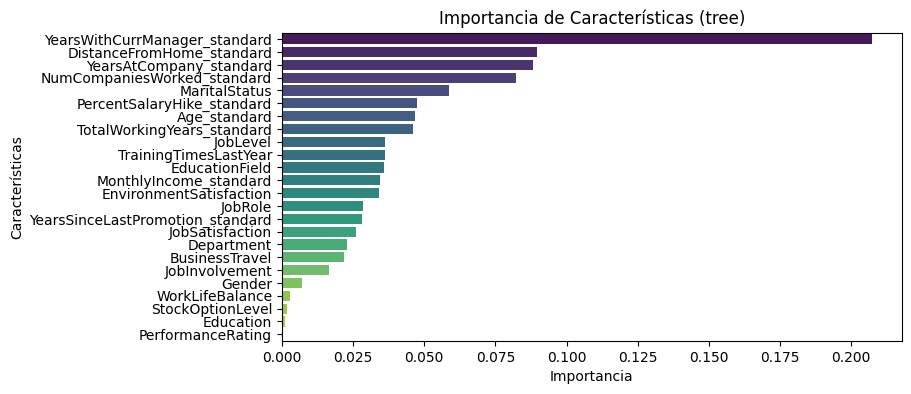

In [85]:
analisis_mod_clas.importancia_predictores("tree")

- En esta primera gráfica tenemos los feature importances, donde podemos ver que las variables más influyentes son “YearsWithCurrManager”, “DistanceFromHome” y “YearsAtCompany”, lo que indica que factores relacionados con estabilidad laboral y ubicación son clave para las predicciones del modelo. Tiene sentido también que los años en la empresa sean indicativo de que un trabajador permanecerá o no, así como el estado civil, que puede influir en la búsqueda de estabilidad. La satisfacción con el trabajo y el ambiente, aunque con resultados mixtos, también afectan al modelo.

- En contraste, características como “Education” y “PerformanceRating” aportando poco valor al modelo. Desde un punto de vista lógico, tiene sentido que, características como el género o la formación influyan poco en la decisión de quedarse o no en la empresa, pero, llama la atención que, las puntuaciones de rendimiento no influyan en la decisión.

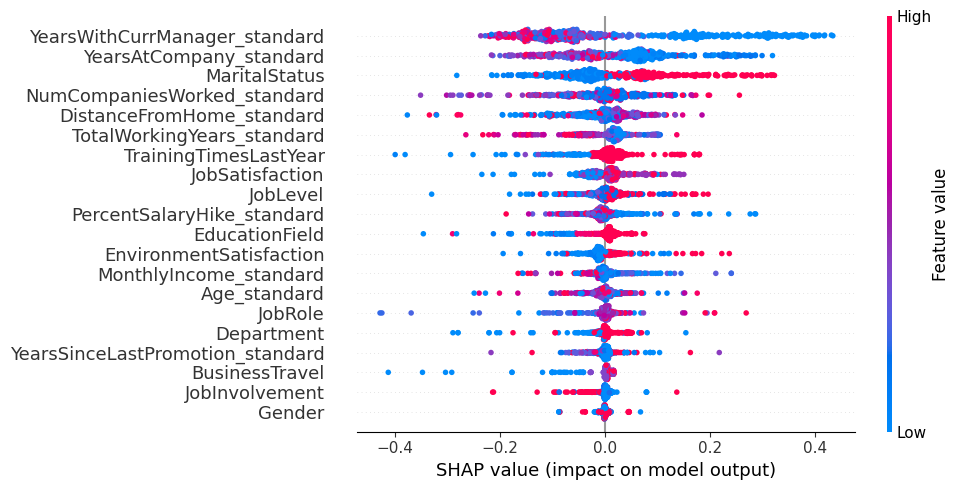

In [90]:
analisis_mod_clas.plot_shap_summary("tree")

- La gráfica SHAP muestra el impacto de cada característica en las predicciones del modelo de ML, la diferencia con los feature importances, es que relaciona unas variables con otras, lo que hace el análisis más certerto. Cada punto representa un dato y su valor SHAP, que indica cuánto contribuye esa característica (positiva o negativamente) a la predicción.

- Las variables están ordenadas por su importancia global, siendo “YearsWithCurrManager” la más influyente. Es el mismo resultado que hemos obtenido en los feature importances. Observamos que, valores bajos de esta característica (en azul) tienden a aumentar la probabilidad de que el empleado renuncie (impacto positivo en el modelo), mientras que valores altos (en rojo) reducen esa probabilidad.

- Otras variables como “YearsAtCompany” y “MaritalStatus” también tienen un impacto significativo. Por ejemplo, valores bajos de “YearsAtCompany” tienden a aumentar el riesgo de renuncia, mientras que el estado civil puede influir dependiendo de su valor específico. Por otro lado, características como “Gender” y “JobInvolvement” tienen un impacto mucho menor, lo que indica que no son factores decisivos para el modelo. Esta visualización refuerza que la estabilidad laboral y las relaciones dentro de la empresa (environment satisfaction) son factores clave para el comportamiento del modelo.

- Veamos una tabla resumen:

### Resumen del Impacto de las Variables en el Modelo

| **Variable**                   | **Impacto en la Predicción**                                                                                      |
|--------------------------------|-------------------------------------------------------------------------------------------------------------------|
| **YearsWithCurrManager**       | Valores bajos aumentan el riesgo de renuncia; valores altos reducen la probabilidad de irse.                      |
| **YearsAtCompany**             | Menor tiempo en la empresa aumenta el riesgo; mayor tiempo disminuye la probabilidad de renuncia.                 |
| **NumCompaniesWorked**         | Más empresas trabajadas incrementan el riesgo de renuncia; menos empresas reducen la probabilidad.                |
| **DistanceFromHome**           | Distancias largas al trabajo aumentan el riesgo; distancias cortas lo reducen.                                    |
| **TotalWorkingYears**          | Empleados con más años de experiencia muestran menor riesgo; menos experiencia incrementa la probabilidad.         |
| **TrainingTimesLastYear**      | Más entrenamientos reducen el riesgo de renuncia; menos entrenamientos incrementan la probabilidad.                |
| **PercentSalaryHike**          | Altos aumentos salariales disminuyen el riesgo; bajos incrementos o ninguno aumentan la probabilidad.             |
| **JobSatisfaction**            | Alta satisfacción laboral reduce el riesgo; baja satisfacción lo incrementa.                                      |
| **EnvironmentSatisfaction**    | Alta satisfacción con el ambiente de trabajo disminuye el riesgo; baja satisfacción lo incrementa.                |
| **MaritalStatus**              | Dependiendo del estado civil, puede influir positiva o negativamente en la probabilidad de renuncia.              |
| **JobLevel**                   | Niveles más altos tienden a reducir el riesgo de renuncia.                                                        |
| **EducationField**             | Menor impacto en la predicción; la formación no es determinante.                                               |
| **MonthlyIncome**              | Mayor ingreso puede estar asociado a una menor probabilidad de renuncia.                                          |
| **Age**                        | Empleados mayores tienden a mostrar menor probabilidad de renuncia.                                               |
| **Department**                 | Menor impacto en el modelo; variación según el departamento.                                                      |
| **YearsSinceLastPromotion**    | Empleados con más tiempo sin ascensos tienden a mostrar mayor riesgo de renuncia.                                |
| **BusinessTravel**             | Frecuencia de viajes laborales tiene menor impacto, aunque puede influir dependiendo del contexto.                |
| **JobInvolvement**             | Bajo involucramiento laboral incrementa el riesgo; mayor involucramiento lo reduce.                               |
| **Gender**                     | Menor impacto; el género no es un factor significativo para la predicción.                                        |

- Analizaremos ahora la matriz de confusión del modelo elegido (Decision Tree), pero echemos primero un vistazo al conjunto de los modelos. 

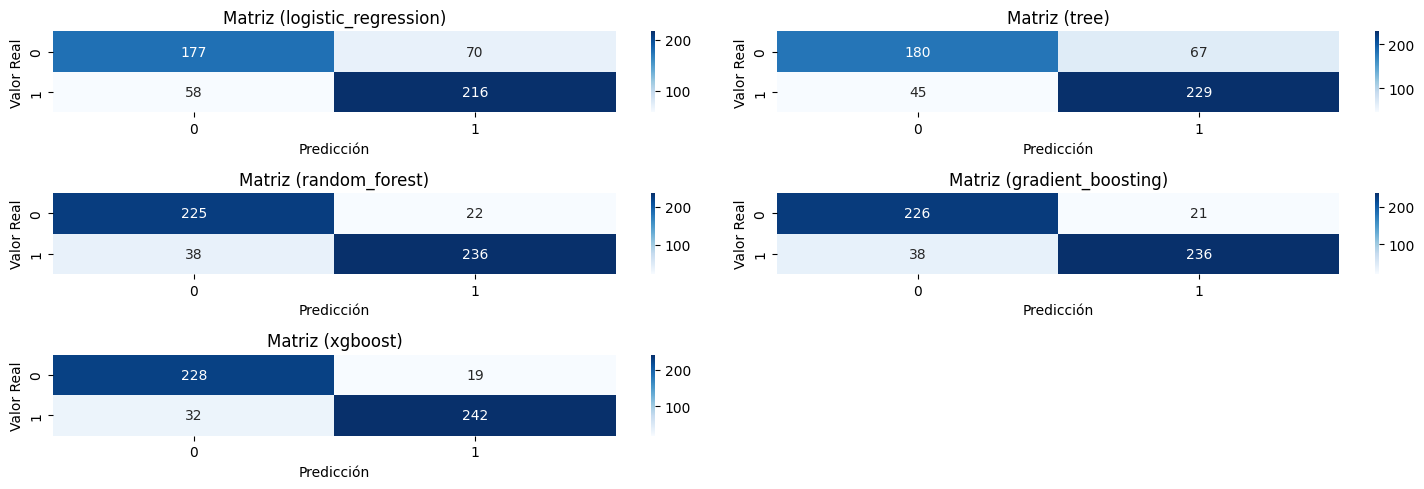

In [93]:
analisis_mod_clas.matrices_confusion(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], figsize=(15,5))

- Recordemos que nos interesaba minimizar los Falsos Negativos, siendo X: 0 e Y: 1 en la matriz (esquina inferior izquierda). Aunque el modelo elegido no muestra la tasa de FN más baja, siendo la más atractiva la opción del XGBoost, con sólamente 32 FN (se ha equivocado en el 13% de las predicciones de quiénes se van), el problema es el alto overfitting que tiene. Eso quiere decir, que se ha aprendido muy bien nuestro conjunto de datos, pero cuando llegue un dato nuevo, tendrá menos probabilidades de clasificarlo correctamente. 

- Volvamos entonces a nuestro modelo elegido, que tiene un recall moderado para la clase positiva (empleados que se van). Aunque ha identificado correctamente 229 empleados que se van, dejó escapar 45 casos (falsos negativos), lo que representa un 20%. Recordemos que, lo que buscamos en este escenario es identificar correctamente a todos los empleados que podrían renunciar.

- En los modelos de ML, sabemos que nos vamos a equivocar, pero debemos elegir dónde nos interesa equivocarnos menos, esa decisión estaría en el balance entre falsos negativos y falsos positivos. Si reducimos los falsos negativos (incrementando el recall), es probable que aumenten los falsos positivos, ya que el modelo será más sensible a predecir salidas, y las acciones que se tomen para evitarlas también implican un coste para la empresa.

- Finalmente, analizaremos la curva ROC y el AUC.

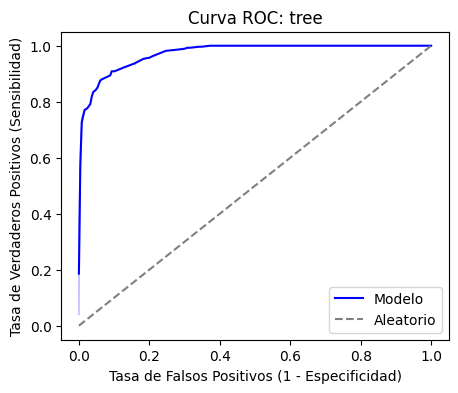

In [52]:
analisis_mod_clas.curva_roc("tree", figsize=(5,4))

- La curva ROC es una representación visual del rendimiento del modelo en todos los umbrales. Se dibuja calculando la tasa de verdaderos positivos (TPR) y una tasa de falsos positivos (FPR) en cada umbral posible. Un modelo perfecto, tiene en algún umbral una TPR de 1.0 y una FPR de 0.0.

<div style="text-align: center;">
    <img src="../../images/roc-auc.png" width="150" alt="ROC AUC">
</div>

- El área bajo la curva ROC (AUC) representa la probabilidad de que el modelo, si se da un ejemplo positivo y negativo elegido al azar, clasificará el positivo mayor que el negativo. El modelo perfecto anterior, que contiene un cuadrado con lados de longitud 1, tiene un área bajo la curva (AUC) de 1.0. Esto significa que hay un 100% de probabilidades de que el modelo clasificará de manera correcta un ejemplo positivo elegido al azar más alto que un ejemplo negativo elegido al azar. 

- Analicemos ahora lo que ocurre con nuestro modelo. Nuestra curva muestra un equilibrio entre recall y especificidad:
	- **Recall alto (FPR):** Detecta correctamente a la mayoría de los empleados que se van.
	- **Especificidad (TPR):** Aunque no se prioriza aquí, la baja tasa de falsos positivos sugiere que el modelo también es relativamente bueno clasificando correctamente a los empleados que se quedan.

- Dado que el objetivo principal es minimizar los falsos negativos (empleados que se van y el modelo no identifica), este modelo parece ser adecuado.

## PDF Resumen

- Consulta el documento de resumen con un análisis completo del problema, los datos, los modelos, resultados y recomendaciones. Disponible en [este enlace](../../datos/Resumen.pdf).